In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [3]:
data=pd.read_csv(r"/content/logistic_regression.csv")

In [4]:
data.shape

(86895, 27)

In [5]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86895 entries, 0 to 86894
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             86895 non-null  float64
 1   term                  86895 non-null  object 
 2   int_rate              86895 non-null  float64
 3   installment           86895 non-null  float64
 4   grade                 86895 non-null  object 
 5   sub_grade             86895 non-null  object 
 6   emp_title             81889 non-null  object 
 7   emp_length            82891 non-null  object 
 8   home_ownership        86895 non-null  object 
 9   annual_inc            86895 non-null  float64
 10  verification_status   86895 non-null  object 
 11  issue_d               86895 non-null  object 
 12  loan_status           86895 non-null  object 
 13  purpose               86894 non-null  object 
 14  title                 86512 non-null  object 
 15  dti                

There are 15 object type columns and 12 float type columns

> Add blockquote




[Text(0, 0, '15'), Text(0, 0, '12')]

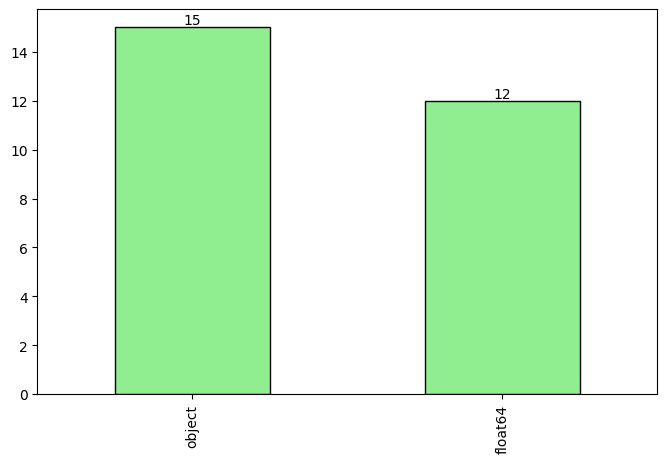

In [7]:
fig,axes=plt.subplots(1,figsize=(8,5))

data.dtypes.value_counts().plot(kind='bar',edgecolor='black',color='lightgreen',ax=axes)
axes.bar_label(axes.containers[0],fmt="%0.f")

Data in loan staus column is imbalance

<Axes: ylabel='count'>

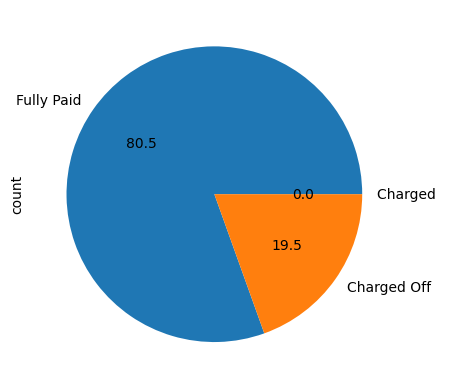

In [9]:
data['loan_status'].value_counts().plot(kind='pie',autopct='%0.1f',color='skyblue')

In [10]:
data.duplicated()  # checking the duplicate columns

,0
0,False
1,False
2,False
3,False
4,False
...,...
86890,False
86891,False
86892,False
86893,False


In [11]:
def show_detail(x):  # This function show the detail of numeric type column
 data_name=x
 x=data[x]
 print(f"there are {x.isnull().sum()} null values in {data_name} column") if x.isnull().sum() else print(f"there is no null value in {data_name} column")
 print(f"Skewness of the data {x.skew()}\n\n")


 fig,axes=plt.subplots(1,3,figsize=(15,4))
 x.describe().plot(kind='bar',color='skyblue',edgecolor='black',ax=axes[0])
 axes[0].bar_label(axes[0].containers[0],fmt='%.f')
 x.plot(kind='kde',color='red',ax=axes[1])
 x.plot(kind='box',color='lightcoral')

 axes[0].set_title(f"Summary Statistics of {data_name} ")
 axes[1].set_title(f"Data density of {data_name} ")
 axes[2].set_title(f"Outliers in {data_name} Data ")

 plt.show()


In [12]:
categorical_data=data.select_dtypes(exclude='number')

In [13]:
categorical_data.describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,86895,86895,86895,81889,82891,86895,86895,86895,86895,86894,86512,86894,86894,86894,86894
unique,2,7,35,47042,11,6,3,115,3,14,13224,623,2,3,86749
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2001,f,INDIVIDUAL,USNS Jones\r\nFPO AA 22690
freq,66186,25577,5919,969,27724,43575,30341,3241,69936,51343,33425,682,52220,86746,4


<Axes: ylabel='count'>

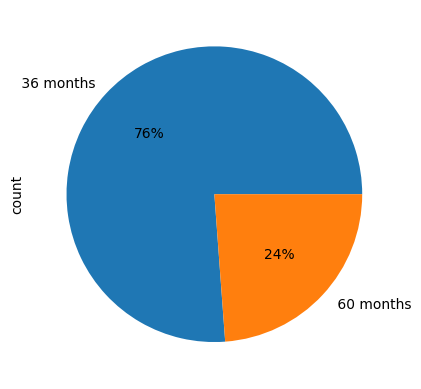

In [14]:
data['term'].value_counts().plot(kind='pie',autopct='%.f%%')

<Axes: xlabel='loan_status'>

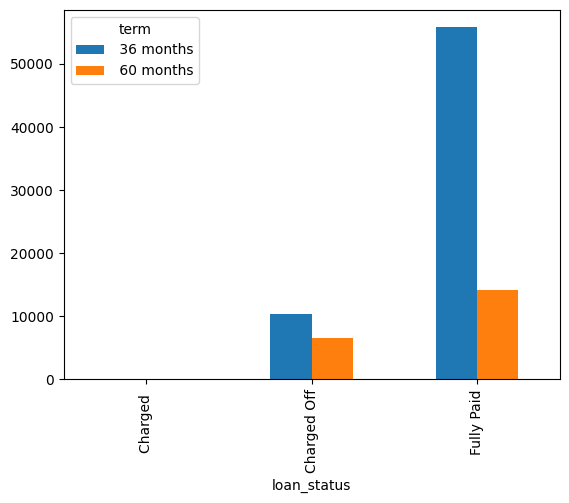

In [15]:
pd.crosstab(data['loan_status'],data['term']).plot(kind='bar')

0


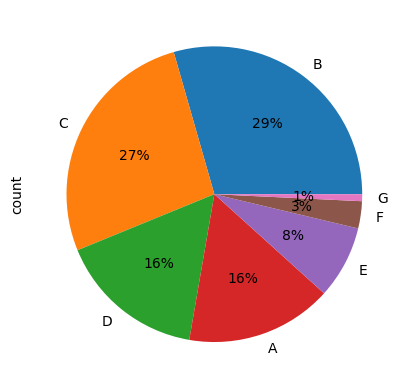

In [16]:
data['grade'].value_counts().plot(kind='pie',autopct='%.f%%')
print(data['grade'].isnull().sum())

conclusion - Most of the B grade have fully paid

<Axes: xlabel='loan_status'>

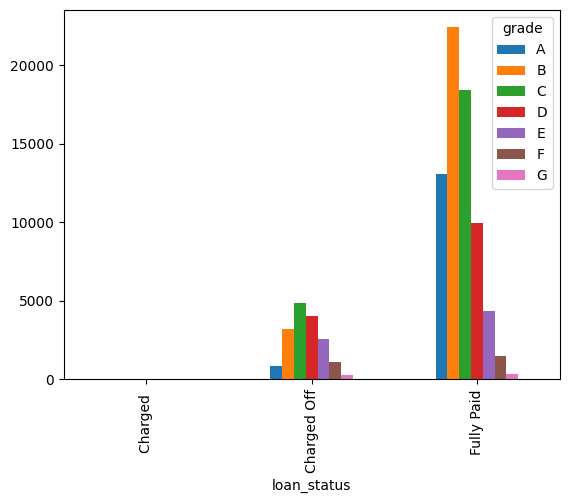

In [17]:
pd.crosstab(data['loan_status'],data['grade']).plot(kind='bar')


0


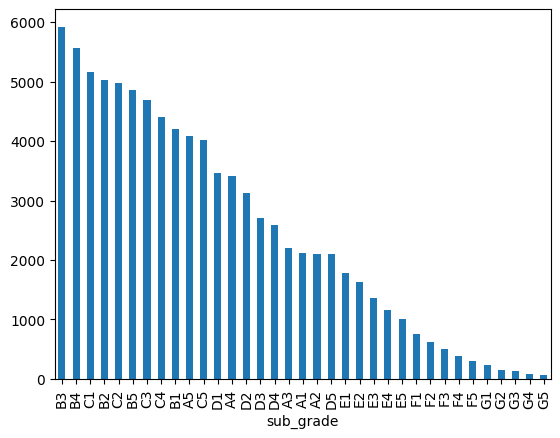

In [18]:
data['sub_grade'].value_counts().plot(kind='bar')
print(data['sub_grade'].isnull().sum())

<Axes: xlabel='sub_grade'>

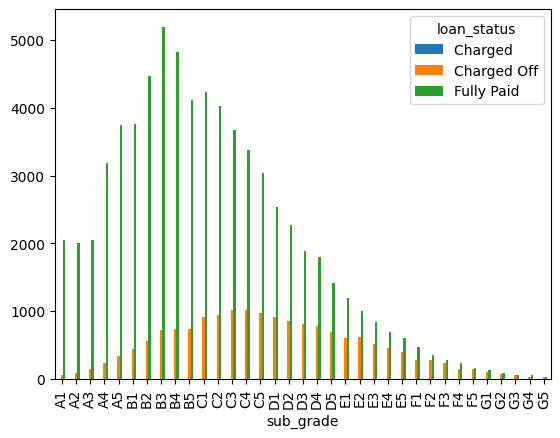

In [19]:
pd.crosstab(data['sub_grade'],data['loan_status']).plot(kind='bar')

In [20]:
def show_object_detail(x,y):

 x=data[x]
 y=data[y]
 print(f"there are {x.isnull.sum()} null values\n\n") if x.isnull().sum() else print(" there is no null values \n\n")
 x.value_counts().plot(kind='pie',autopct='%.f%%')
 pd.crosstab(x,y,normalize='columns').plot(kind='bar')

 there is no null values 




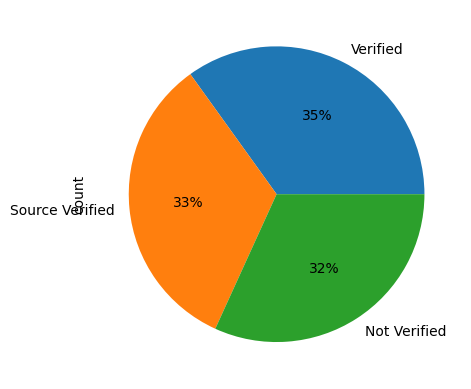

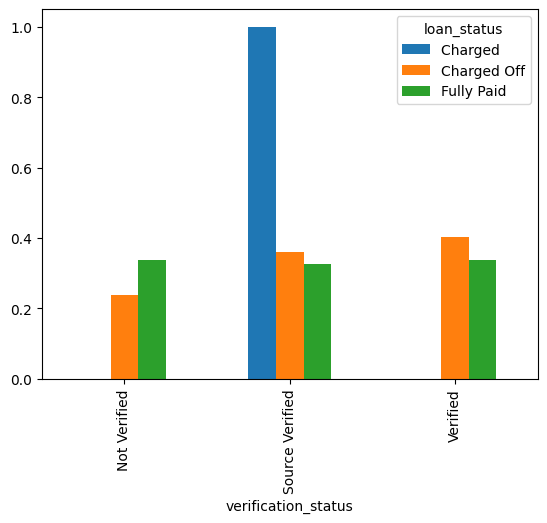

In [21]:
show_object_detail('verification_status','loan_status')

 there is no null values 




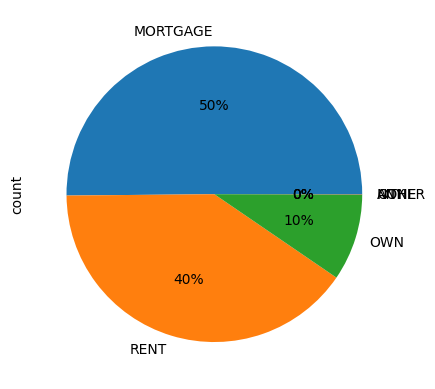

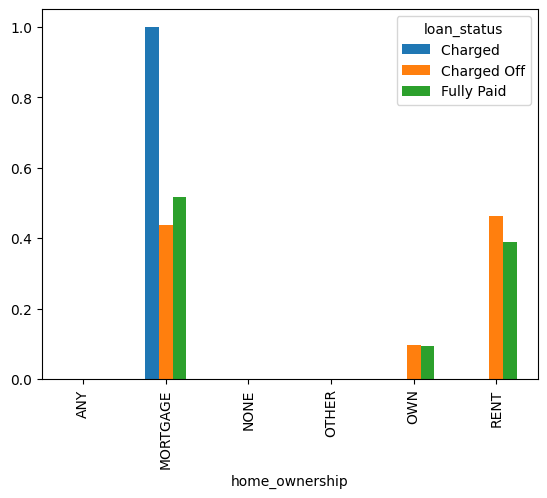

In [22]:
show_object_detail('home_ownership','loan_status')

Some mix object type has null values

In [27]:
categorical_data.isnull().sum()

,0
term,0
grade,0
sub_grade,0
emp_title,5006
emp_length,4004
home_ownership,0
verification_status,0
issue_d,0
loan_status,0
purpose,1


In [28]:
contain_null=['emp_title','emp_length','title']

In [29]:
data['emp_title'].head()
data['emp_title']=data['emp_title'].fillna('Unemployed')  # filling the null values of emp_title columns with Unemployement


In [30]:
data['emp_length'].head()

,emp_length
0,10+ years
1,4 years
2,< 1 year
3,6 years
4,9 years


<Axes: xlabel='emp_length'>

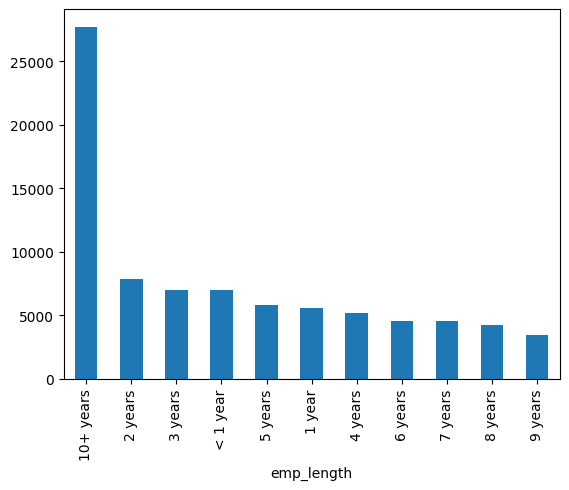

In [31]:
data['emp_length'].value_counts().plot(kind='bar')

<Axes: xlabel='emp_length'>

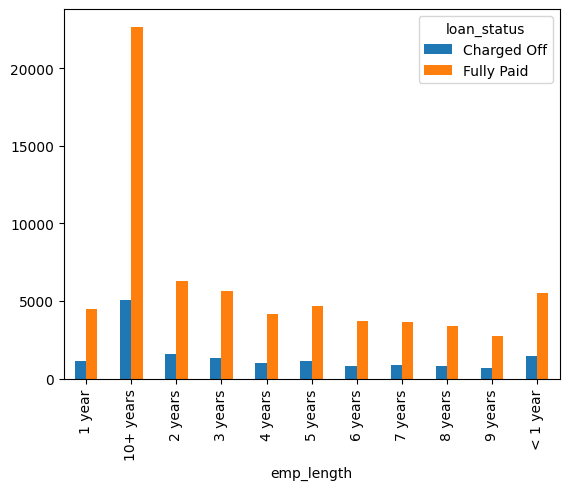

In [32]:
pd.crosstab(data['emp_length'],data['loan_status']).plot(kind='bar')

In [33]:
data['emp_length'].isnull().sum()

4004

In [34]:
data['emp_length']=data['emp_length'].fillna('10+ years')

In [37]:
null_numeric_data=['revol_util','mort_acc','pub_rec_bankruptcies']

<Axes: ylabel='Density'>

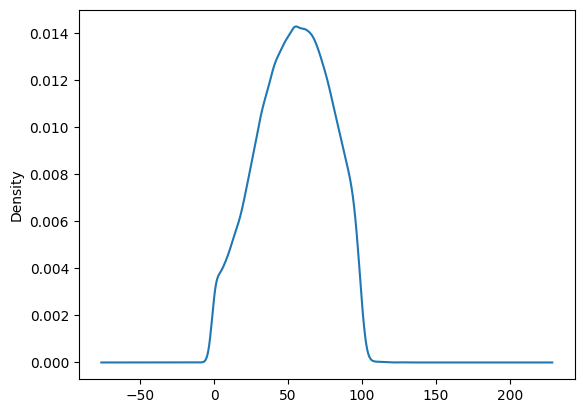

In [38]:
data['revol_util'].plot(kind='kde')

In [39]:
data[data['revol_util']>150]=150

<Axes: ylabel='Density'>

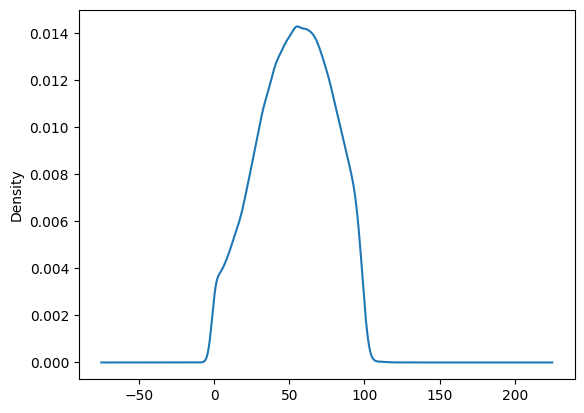

In [40]:
data['revol_util'].plot(kind='kde')


<Axes: >

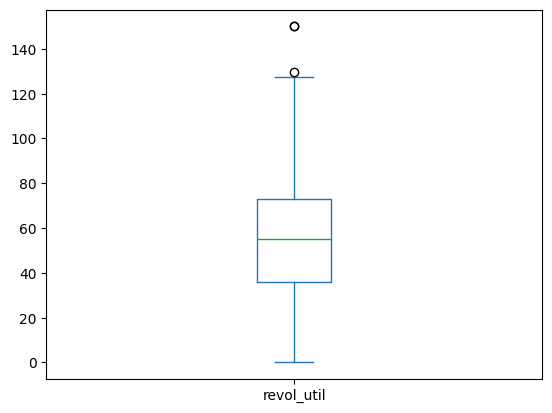

In [41]:
data['revol_util'].plot(kind='box')

In [42]:
data['revol_util'].isnull().sum()

64

In [43]:
data['revol_util'].describe()

,revol_util
count,86831.000000
mean,53.831018
std,24.389919
min,0.000000
25%,36.000000
50%,54.900000
75%,72.800000
max,150.000000


In [44]:
data['revol_util']=data['revol_util'].fillna(55)

In [45]:
data['mort_acc'].describe()

,mort_acc
count,78627.000000
mean,1.815928
std,2.265741
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,150.000000


Conclusion : mort_account columns is containing some outliers eleminate outliers with a thresh hold value which is 6.5 and fill the null values with 0

<Axes: >

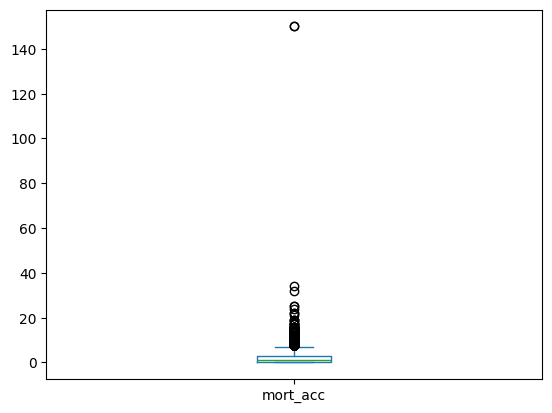

In [46]:
data['mort_acc'].plot(kind='box')


<Axes: xlabel='mort_acc'>

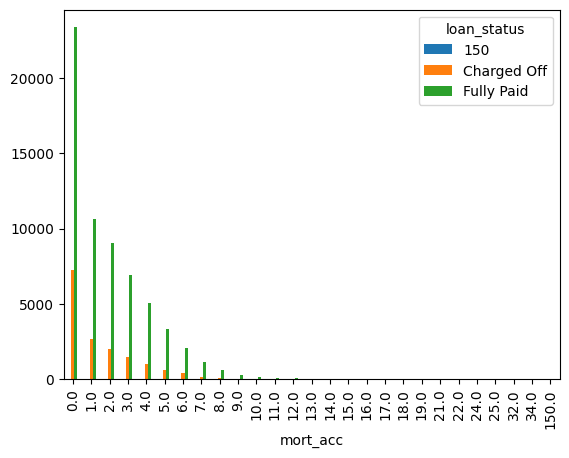

In [47]:
pd.crosstab(data['mort_acc'],data['loan_status']).plot(kind='bar')

In [48]:
data[data['mort_acc']>9]=9

<Axes: xlabel='mort_acc'>

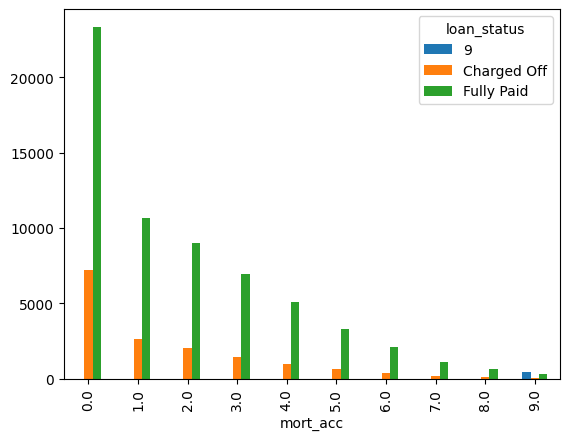

In [49]:
pd.crosstab(data['mort_acc'],data['loan_status']).plot(kind='bar')

In [50]:
mort_acc=data['mort_acc']

In [51]:
mort_acc[mort_acc>6.5]=6.5   # removing the outliers


<ipython-input-51-2e163bacd554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_acc[mort_acc>6.5]=6.5   # removing the outliers


<Axes: >

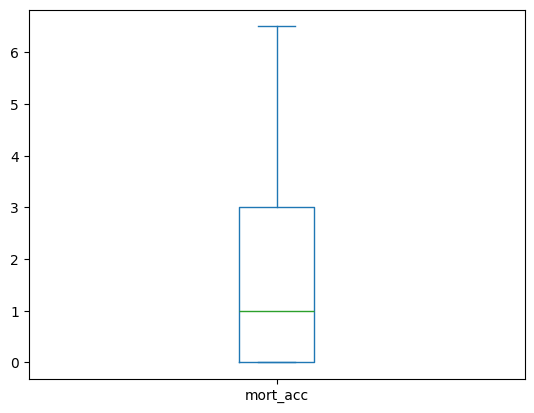

In [52]:
mort_acc.plot(kind='box')

<Axes: xlabel='mort_acc'>

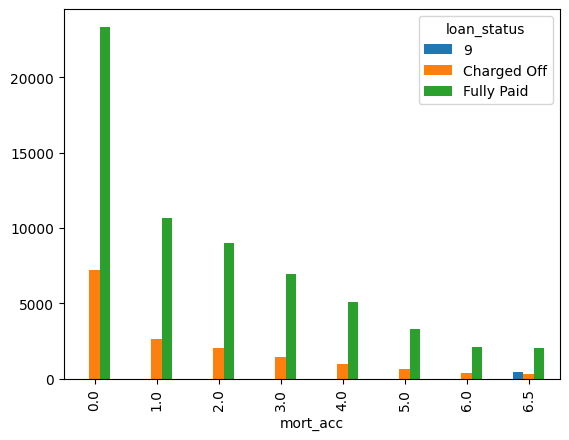

In [53]:
pd.crosstab(mort_acc,data['loan_status']).plot(kind='bar')

In [54]:
mort_acc.isnull().sum()

8268

In [55]:
data['mort_acc']=data['mort_acc'].fillna(0)

<Axes: >

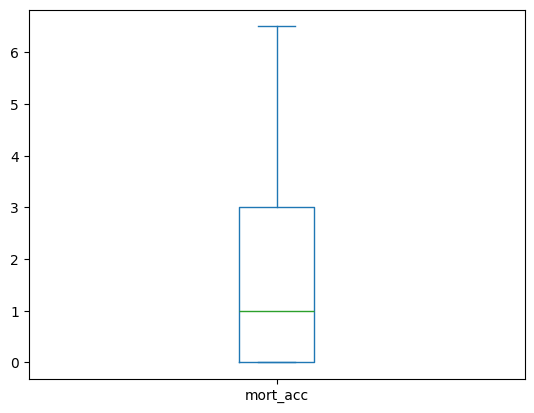

In [56]:
data['mort_acc'].plot(kind='box')


In [57]:
data['pub_rec_bankruptcies'].describe()

,pub_rec_bankruptcies
count,86799.000000
mean,0.166995
std,0.727880
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


<Axes: xlabel='pub_rec_bankruptcies'>

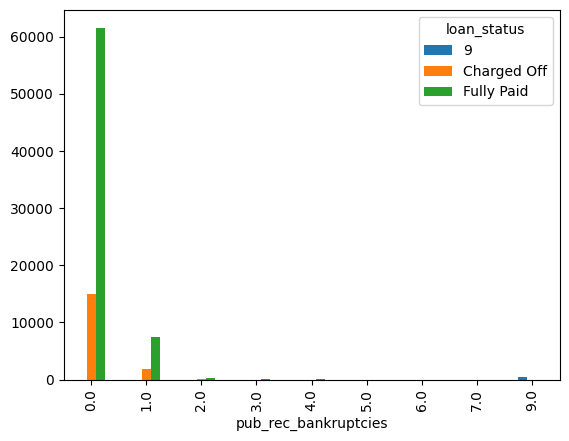

In [58]:
pd.crosstab(data['pub_rec_bankruptcies'],data['loan_status']).plot(kind='bar')

In [59]:
data['pub_rec_bankruptcies']=data['pub_rec_bankruptcies'].fillna(0)   # fill the null values with 0
data[data['pub_rec_bankruptcies']>2]=2  # removing outliers with threshold

In [60]:
categorical_data.isnull().sum()

,0
term,0
grade,0
sub_grade,0
emp_title,5006
emp_length,4004
home_ownership,0
verification_status,0
issue_d,0
loan_status,0
purpose,1


In [61]:
data['title'].head()

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance


In [62]:
data['title'].isnull().sum()

379

In [63]:
data['title']=data['title'].fillna('other')

<Axes: xlabel='application_type'>

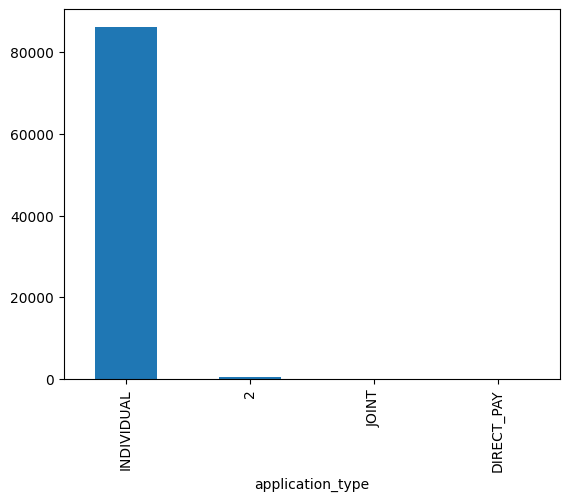

In [64]:
data['application_type'].value_counts().plot(kind='bar')

In [65]:
data['application_type']=data['application_type'].fillna('JOINT')

<Axes: xlabel='initial_list_status'>

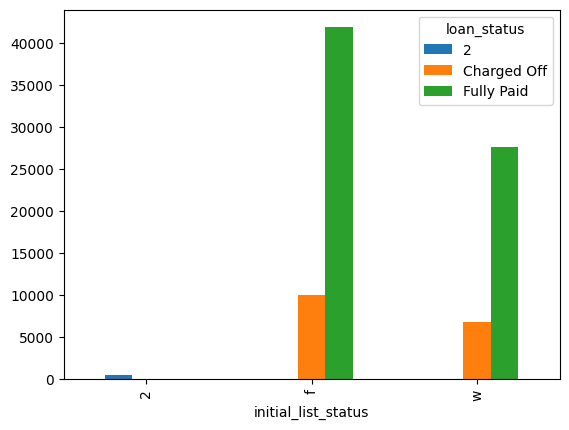

In [66]:
pd.crosstab(data['initial_list_status'],data['loan_status']).plot(kind='bar')

In [67]:
data['initial_list_status']=data['initial_list_status'].fillna('f')

In [68]:
data.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [69]:
data['address']=data['address'].fillna('Sabrina')

<Axes: ylabel='Density'>

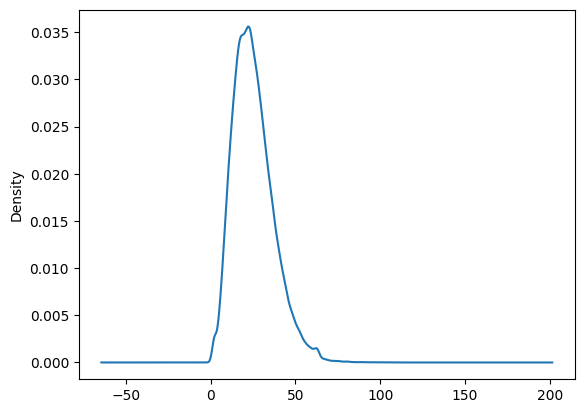

In [70]:
data['total_acc'].plot(kind='kde')

In [71]:
data['total_acc'].describe()

,total_acc
count,86894.000000
mean,25.209128
std,11.933883
min,2.000000
25%,17.000000
50%,24.000000
75%,32.000000
max,135.000000


<Axes: >

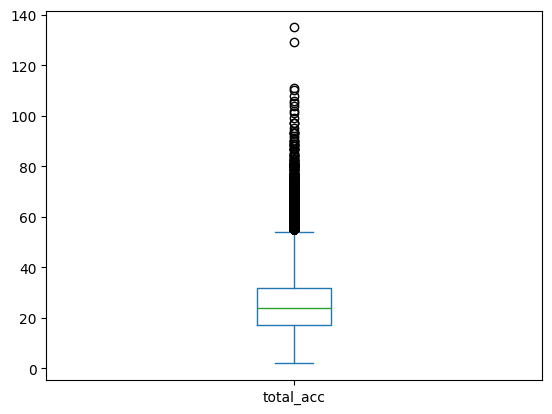

In [72]:
data['total_acc'].plot(kind='box')

In [73]:
data[data['total_acc']>50]=50  # eleminating the outliers

<Axes: >

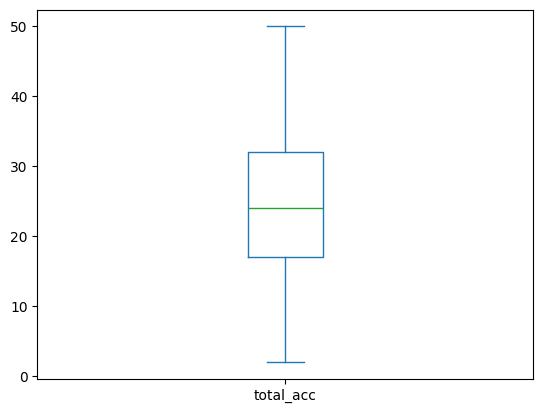

In [74]:
data['total_acc'].plot(kind='box')

In [75]:
data['total_acc']=data['total_acc'].fillna(data['total_acc'].mean())

In [76]:
data.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [79]:
filtered_rows = data[(data['loan_amnt'] > 35000) & (data['loan_status'] == "Fully Paid")]


In [81]:
print(len(filtered_rows))

54


In [82]:
lower_percentile = data['loan_amnt'].quantile(0.01)  # 1st percentile
upper_percentile = data['loan_amnt'].quantile(0.95)  # 99th percentile

# Replace outliers
data['loan_amnt'] = data['loan_amnt'].clip(lower=lower_percentile, upper=upper_percentile)


Conclusion : Loan_amnt wast conaining many outliers and highly skewed after performing normalization Loan_amnt column ready to feed machine model

there is no null value in loan_amnt column
Skewness of the data 0.5006640628056518




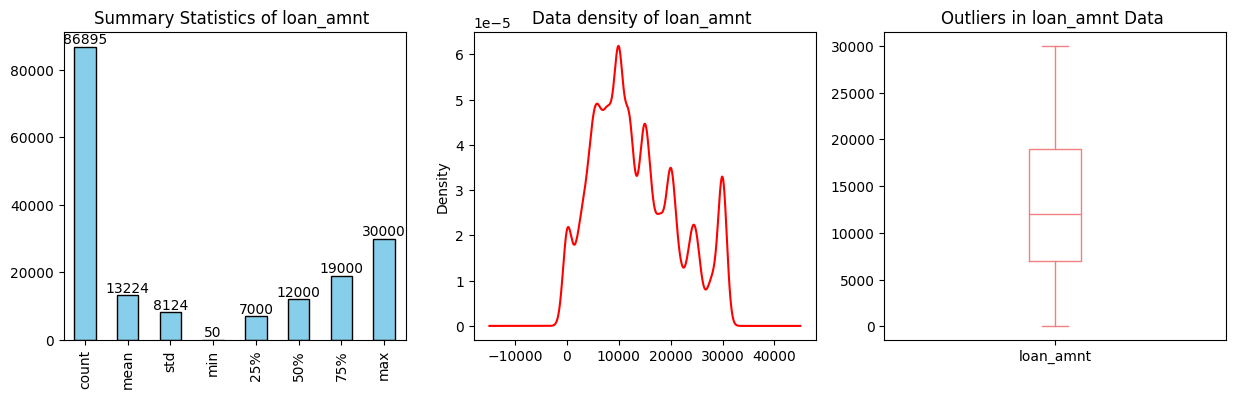

In [83]:
show_detail('loan_amnt')

<ipython-input-85-e9cf1b1af229>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='loan_amnt', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


<Axes: xlabel='loan_amnt', ylabel='Density'>

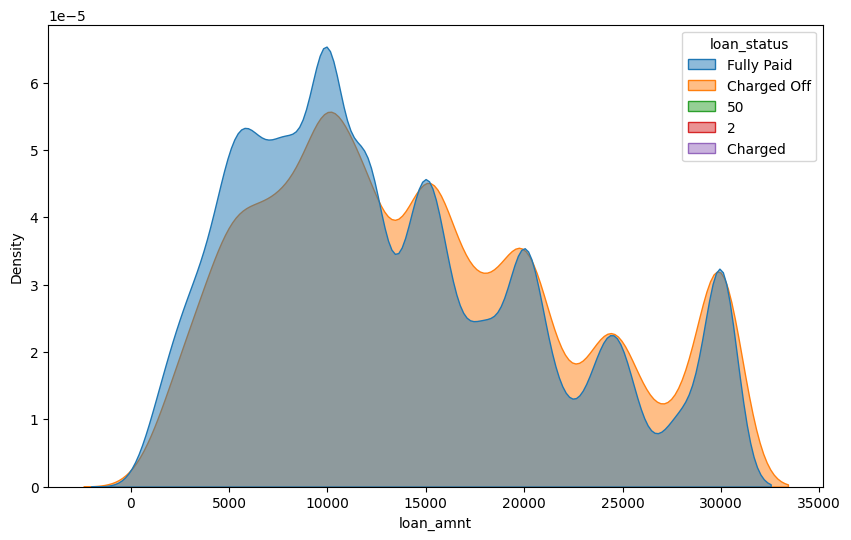

In [85]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='loan_amnt', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


there is no null value in int_rate column
Skewness of the data 2.846536176752051




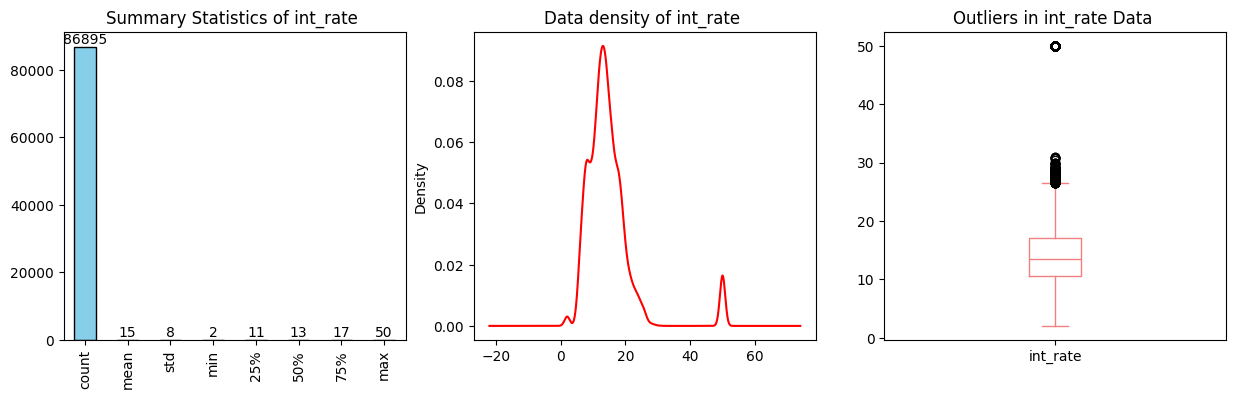

In [86]:
# analyze the int_rate column
show_detail('int_rate')

Normalization of int_rate column

In [87]:
lower_percentile = data['int_rate'].quantile(0.01)  # 1st percentile
upper_percentile = data['int_rate'].quantile(0.95)  # 99th percentile

# Replace outliers
data['int_rate'] = data['int_rate'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in int_rate column
Skewness of the data 0.42590099215181143




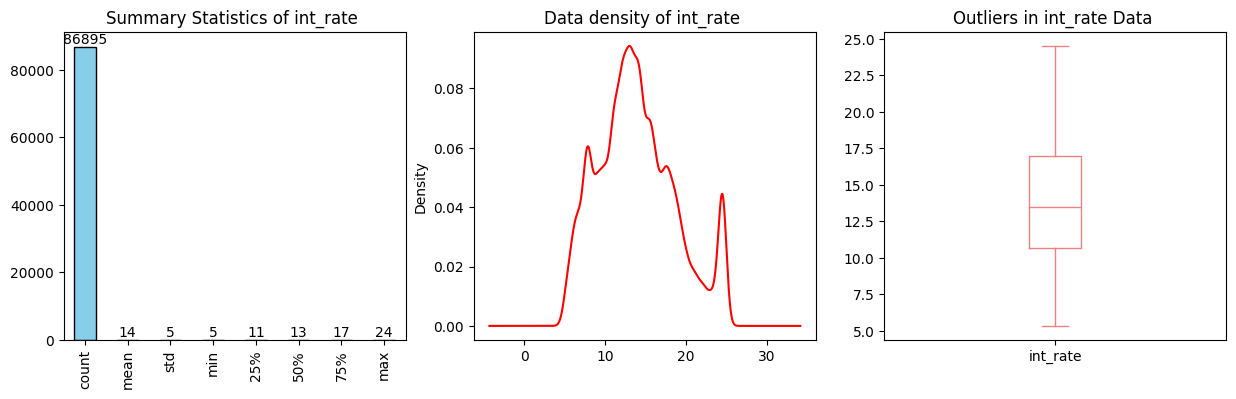

In [88]:
show_detail('int_rate')

there is no null value in installment column
Skewness of the data 0.9282794026692328




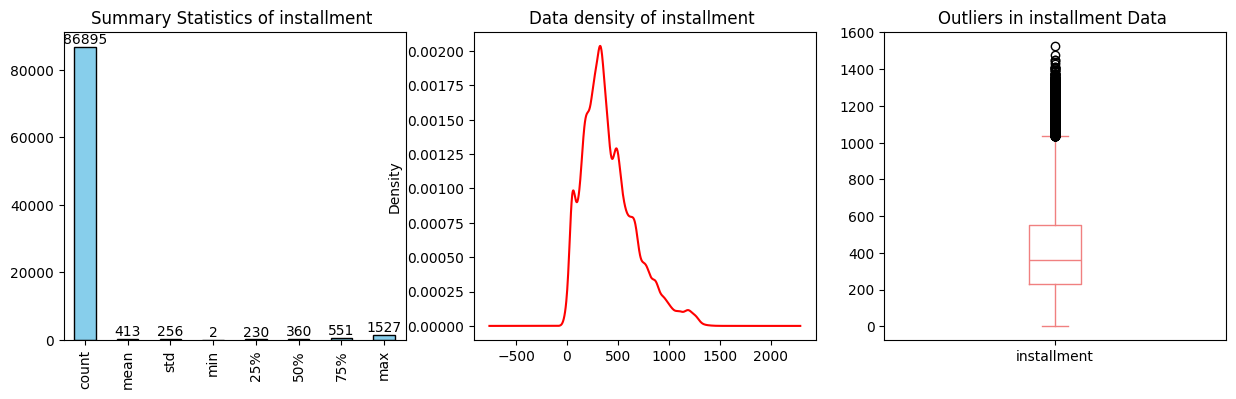

In [89]:
# showing the detail of installment column
show_detail('installment')

In [90]:
lower_percentile = data['installment'].quantile(0.01)  # 1st percentile
upper_percentile = data['installment'].quantile(0.95)  # 99th percentile

# Replace outliers with 95 percentile value of installment column
data['installment'] = data['installment'].clip(lower=lower_percentile, upper=upper_percentile)

Normalize the installment column

there is no null value in installment column
Skewness of the data 0.5570473049926646




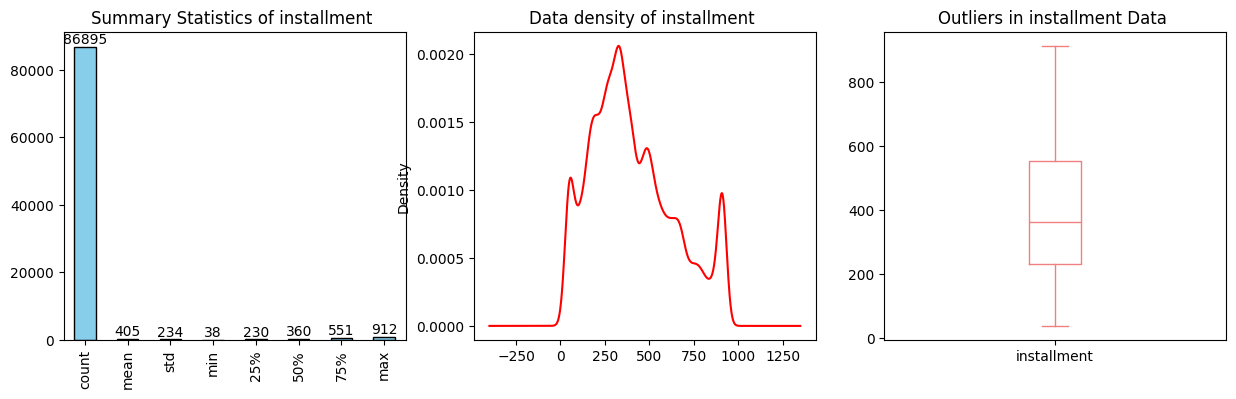

In [91]:
show_detail('installment')

<ipython-input-92-183d443d9cd1>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='installment', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


<Axes: xlabel='installment', ylabel='Density'>

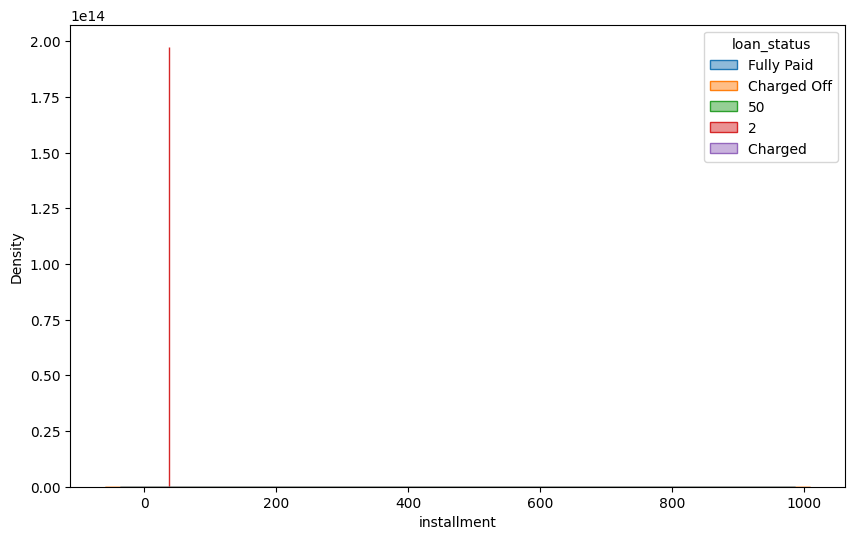

In [92]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='installment', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


Noramalize the annual income column

there is no null value in annual_inc column
Skewness of the data 20.55438699832471




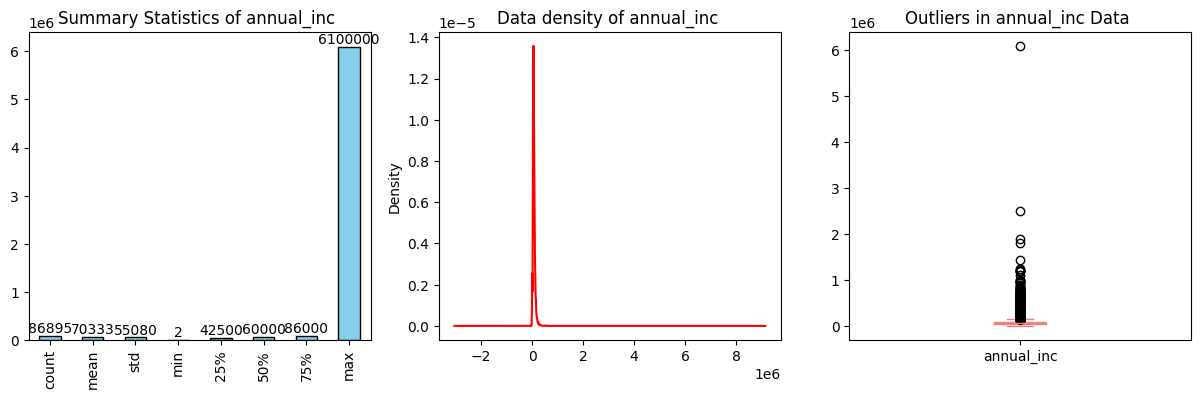

In [93]:
show_detail('annual_inc')

<ipython-input-94-fb28805b72ca>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='annual_inc', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


<Axes: xlabel='annual_inc', ylabel='Density'>

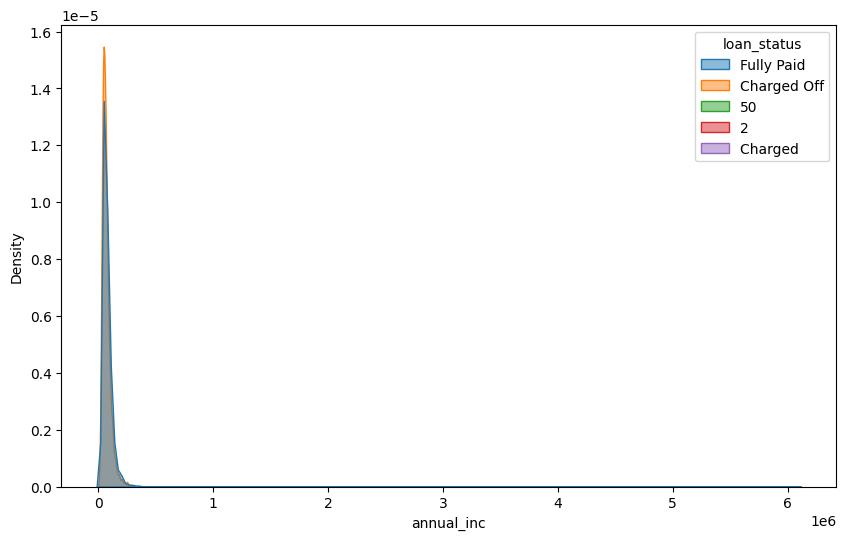

In [94]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='annual_inc', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


In [95]:
lower_percentile = data['annual_inc'].quantile(0.01)  # 1st percentile
upper_percentile = data['annual_inc'].quantile(0.95)  # 99th percentile

# Replace outliers with 95 percentile value of installment column
data['annual_inc'] = data['annual_inc'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in annual_inc column
Skewness of the data 0.5806589641953183




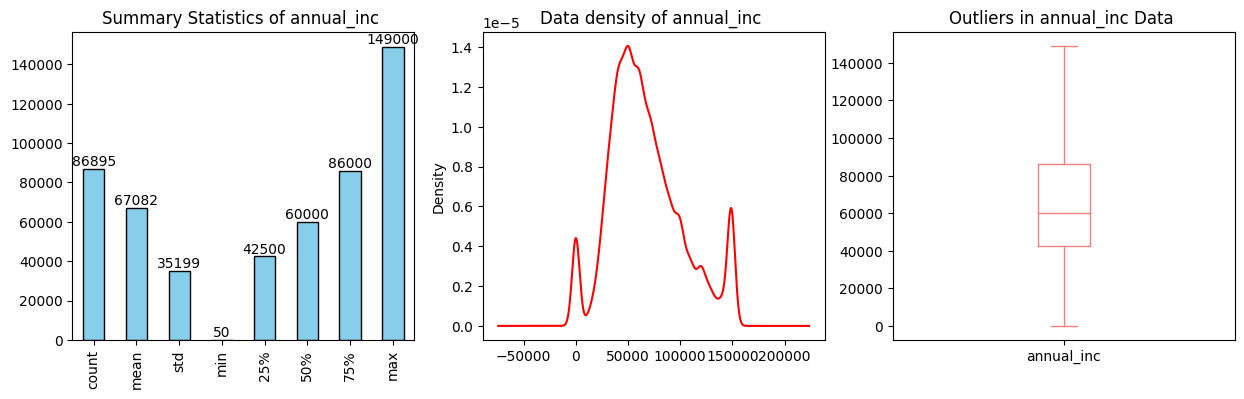

In [96]:
show_detail('annual_inc')

Normalize the dti column

there are 1 null values in dti column
Skewness of the data 1.084195175483566




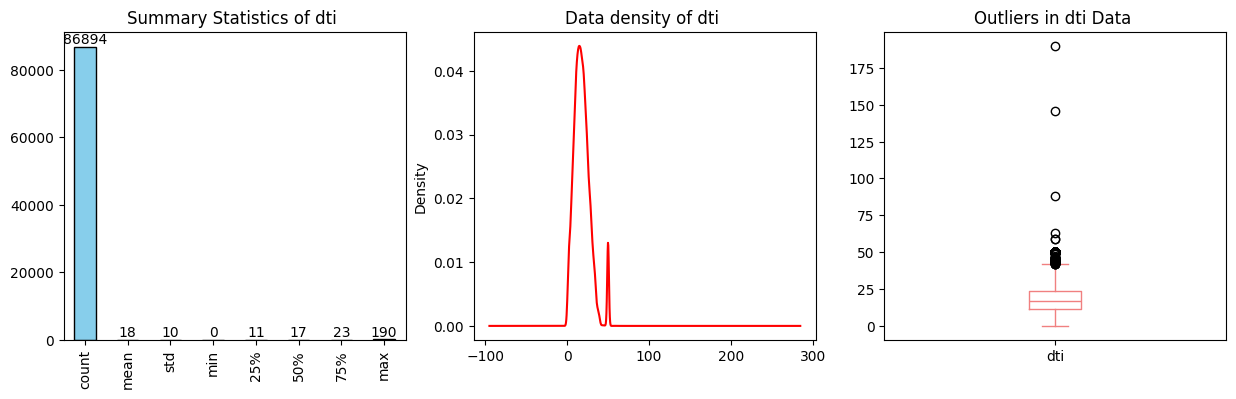

In [97]:
#  showing the detail of dti column

show_detail('dti')

In [98]:
lower_percentile = data['dti'].quantile(0.01)  # 1st percentile
upper_percentile = data['dti'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['dti'] = data['dti'].clip(lower=lower_percentile, upper=upper_percentile)

there are 1 null values in dti column
Skewness of the data 0.13858277990829787




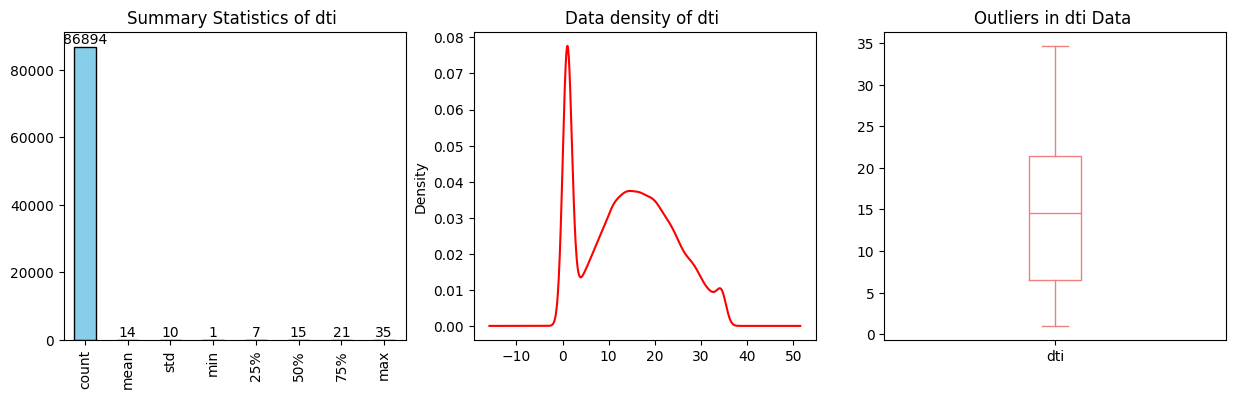

In [140]:
show_detail('dti')
data['dit']=data['dti'].fillna(data['dti'].mean())

Normalize the open account column
which is containing outliers

there are 1 null values in open_acc column
Skewness of the data 3.012987621511214




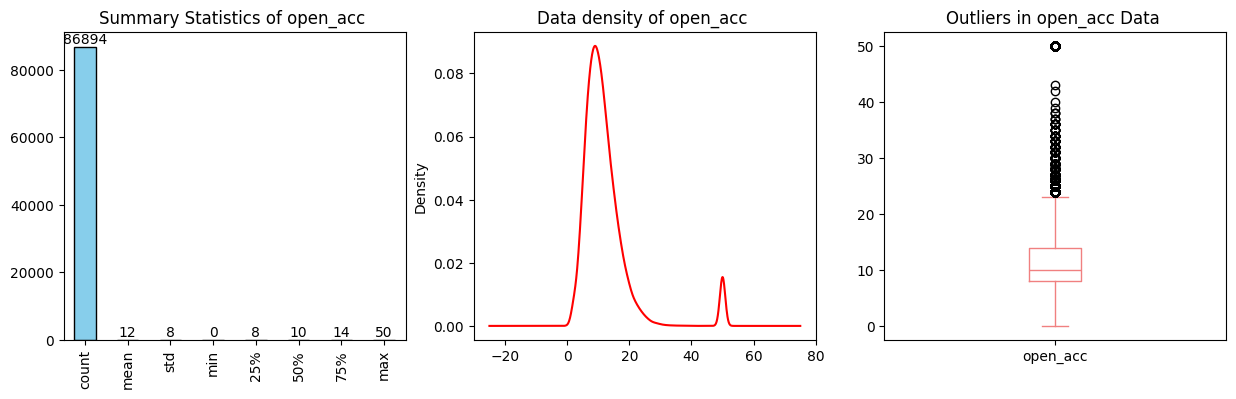

In [99]:
show_detail('open_acc')

In [100]:
lower_percentile = data['open_acc'].quantile(0.01)  # 1st percentile
upper_percentile = data['open_acc'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['open_acc'] = data['open_acc'].clip(lower=lower_percentile, upper=upper_percentile)

there are 1 null values in open_acc column
Skewness of the data 0.6843539007820701




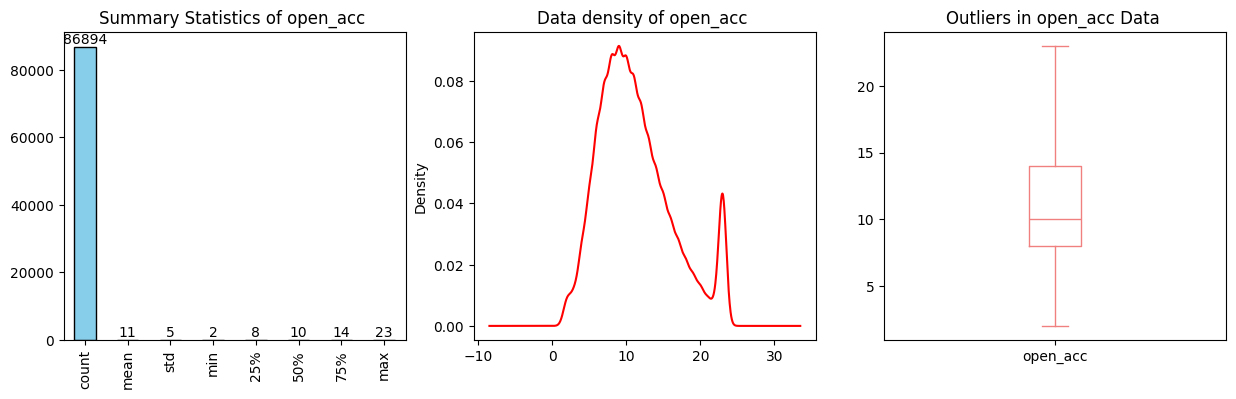

In [101]:
show_detail('open_acc')

Normalize the pub_rec column

there are 1 null values in pub_rec column
Skewness of the data 5.142264681761851




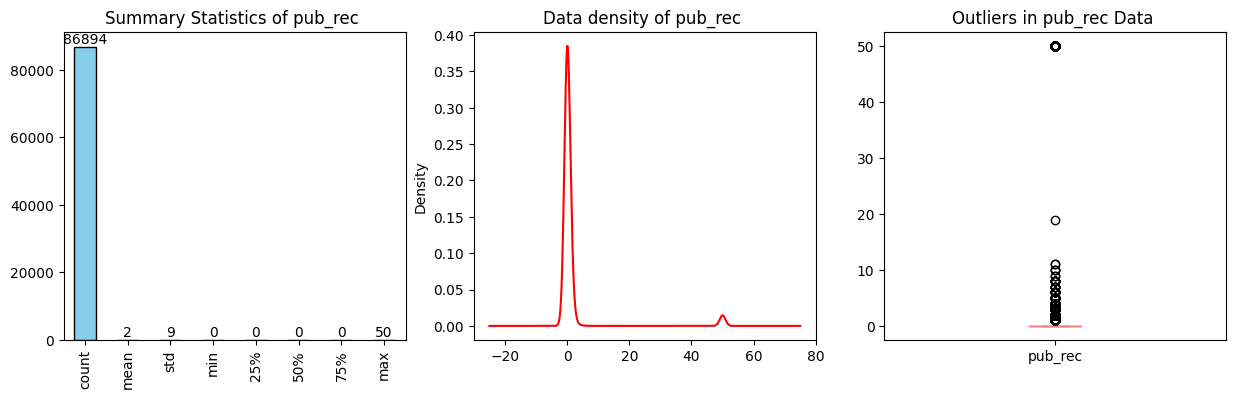

In [102]:
show_detail('pub_rec')

In [103]:
data[data['pub_rec']>0]=1

there are 1 null values in pub_rec column
Skewness of the data 1.6847781005685056




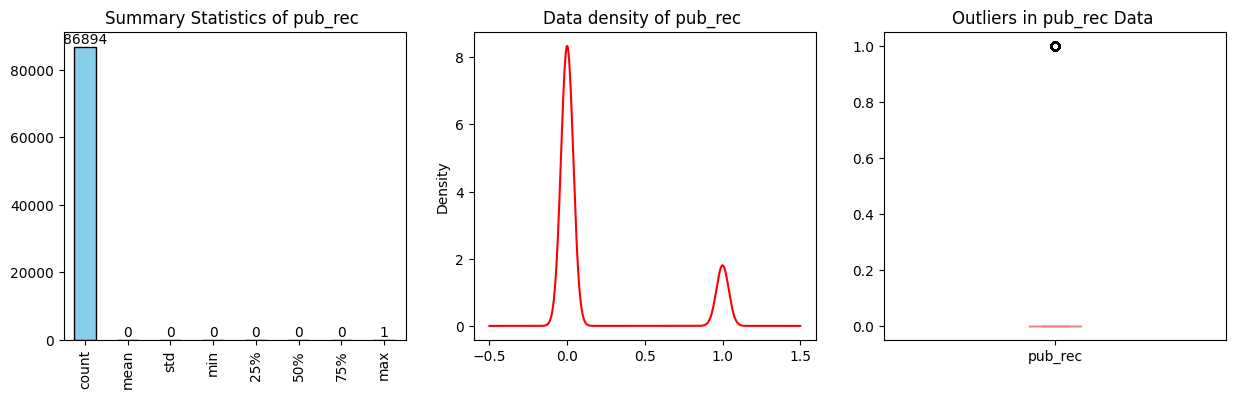

In [104]:
show_detail('pub_rec')

there are 1 null values in revol_bal column
Skewness of the data 7.334566405168582




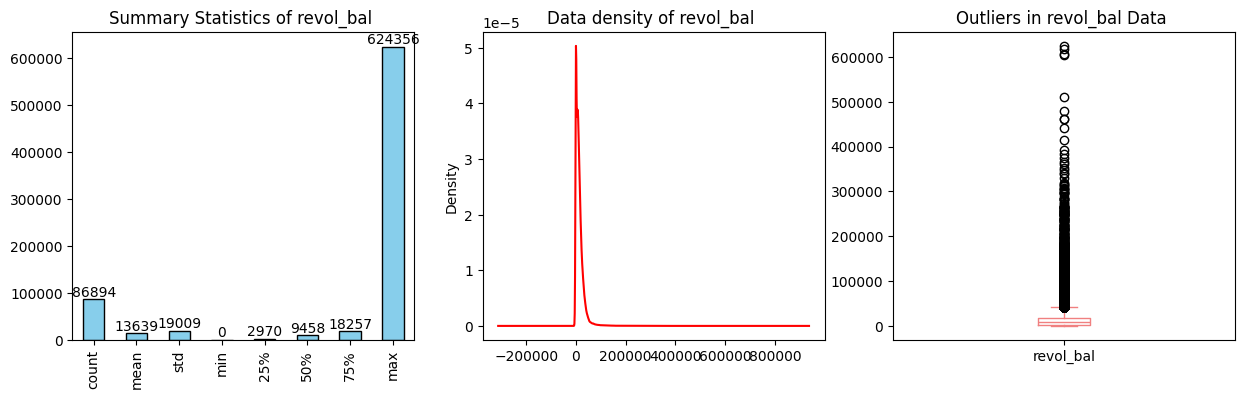

In [105]:
show_detail('revol_bal')

In [106]:
lower_percentile = data['revol_bal'].quantile(0.01)  # 1st percentile
upper_percentile = data['revol_bal'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['revol_bal'] = data['revol_bal'].clip(lower=lower_percentile, upper=upper_percentile)

there are 1 null values in revol_bal column
Skewness of the data 0.9293771545388672




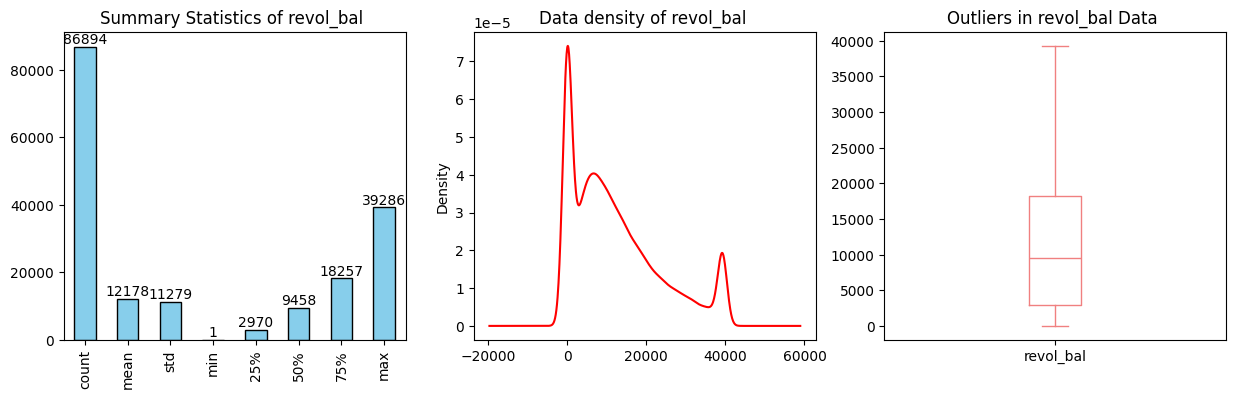

In [107]:
show_detail('revol_bal')

there is no null value in total_acc column
Skewness of the data 0.09517896416752045




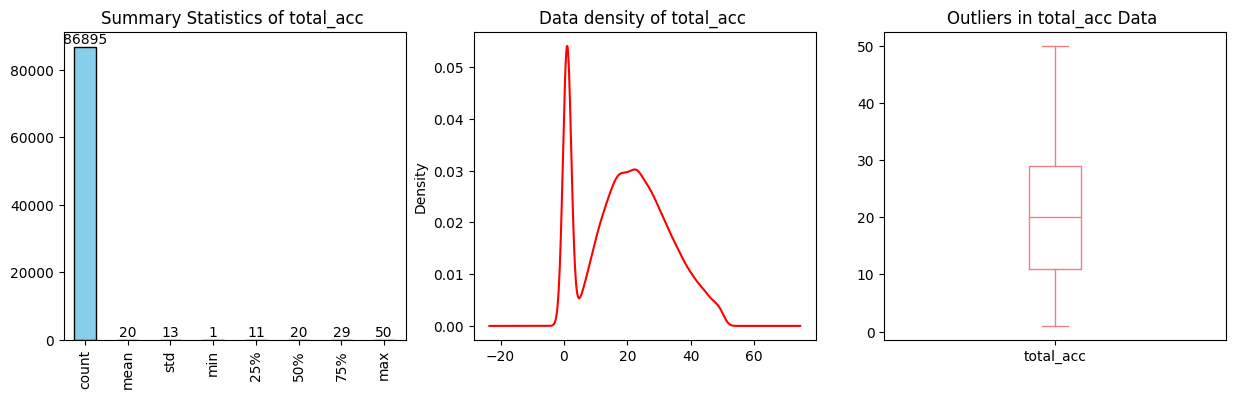

In [108]:
show_detail('total_acc')

In [109]:
lower_percentile = data['total_acc'].quantile(0.01)  # 1st percentile
upper_percentile = data['total_acc'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['total_acc'] = data['total_acc'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in total_acc column
Skewness of the data -0.015457157344153457




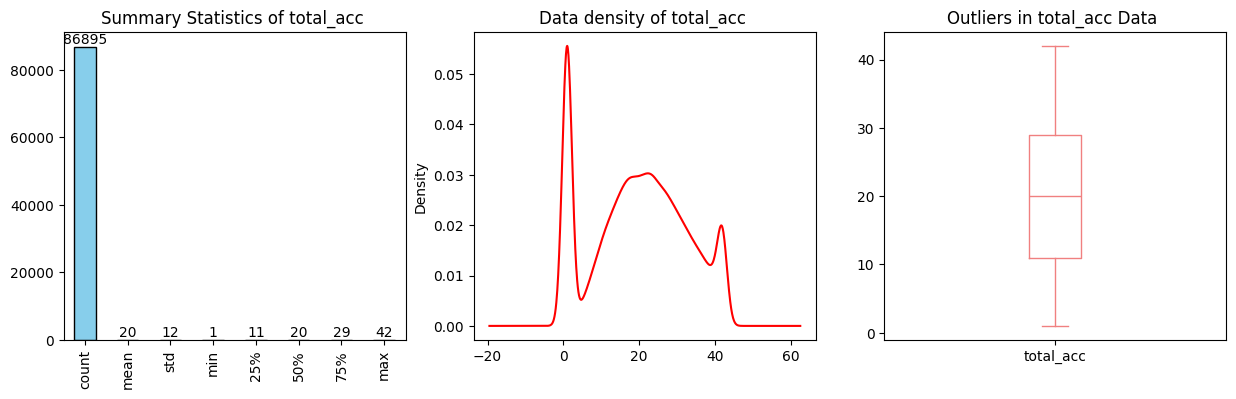

In [110]:
show_detail('total_acc')

there is no null value in revol_util column
Skewness of the data -0.11886930861585682




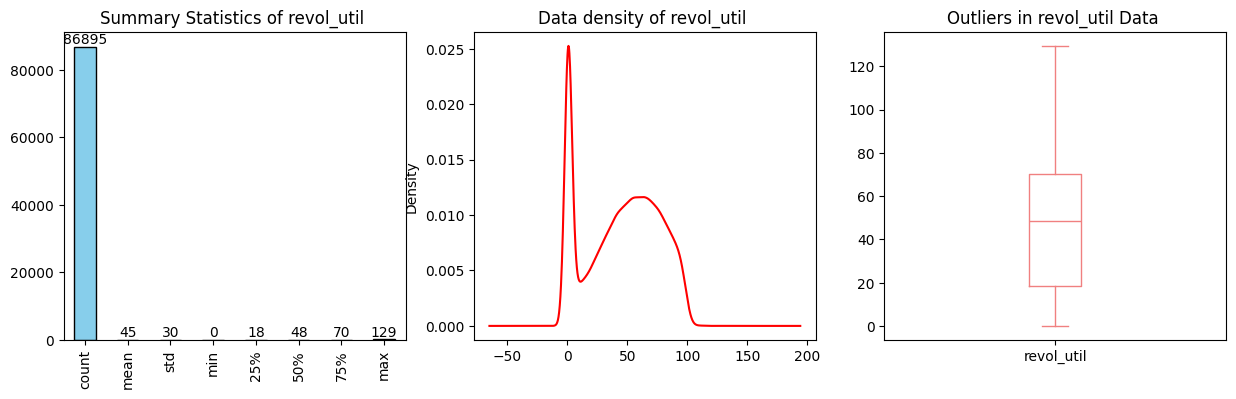

In [112]:
show_detail('revol_util')

In [114]:
data['revol_util']=data['revol_util'].fillna(50)

We have normalize the data

Converting the date columns (issue_d and earliest cr line ) into history length columns

In [115]:

from datetime import datetime

# Convert to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Calculate credit history length in years
current_date = datetime.now()
data['issue_data_history_length'] = (current_date - data['issue_d']).dt.days / 365

data.drop(columns='issue_d',inplace=True) # after creating date history column  delete the issue_d column


<ipython-input-115-ec85b9855ddb>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


In [126]:

data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

# Calculate credit history length in years
current_date = datetime.now()
data['credit_history_length'] = (current_date - data['earliest_cr_line']).dt.days / 365

data.drop(columns='earliest_cr_line',inplace=True)


KeyError: 'earliest_cr_line'

In [117]:
data.select_dtypes(exclude='number').head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Charged Off,credit_card,Credit Card Refinance,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [118]:
data['term'] = data['term'].apply(lambda x: int(str(x)[:3]))



In [127]:
data.drop(columns='address')

data['credit_history_length']=data['credit_history_length'].fillna(data['credit_history_length'].mean())


In [141]:
data.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [129]:
encoder=LabelEncoder()

for col in data.select_dtypes(exclude='number'):
  data[col] = data[col].apply(lambda x: str(x) if isinstance(x, (int, float)) else x)

  data[col]=encoder.fit_transform(data[col])

In [136]:
x=data.drop(columns='loan_status')
y=data['loan_status']

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [138]:
model=LogisticRegression()

In [142]:
model.fit(x_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
prediction =model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,prediction)

In [ ]:
scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.84012575 0.84055501 0.84032775 0.84028988 0.84011312]
Mean accuracy: 0.8402823018458199


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
scores.mean()

0.8402823018458199